Define each areas by cells number. Starting with number 
1 from top left, and ending with number n from bottom right. 
Exampe as 2 row, 3 columns: 
.___.____.____.
| 1 || 2 || 3 |
.___.____.____.
| 4 || 5 || 6 |
.___.____.____.
Enter the number of rows: 3
Enter the number of columns: 3
After pick the defined area (quarantine, vaccine, play ground), 
and the rest area will be undefined area. 
Define quarantine place by cell number (Enter separated by space): 1
Define vaccine spot by cell number(Enter separated by space): 2
Define play ground by cell number(Enter separated by space): 3


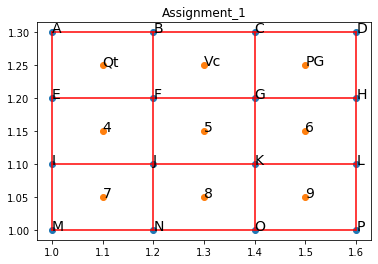

Please enter x coordinate range 1.0 to 1.6 for node
Please enter y coordinate range 1.0 to 1.3 for node
Enter start node as 'x y' with space between: 1.3 1.17
Enter end node (For checking role type purpose) as 'x y' with space between: 1.1 1.23


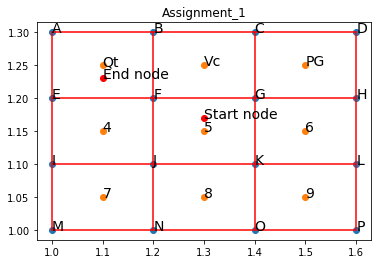

----Path found----
G
F
B
----Path costs----
2.5
------------------


In [1]:
from mapGenerate import *
from mapPathFinding import *

# Instruction for defining area by cell number
print("Define each areas by cells number. Starting with number ")
print("1 from top left, and ending with number n from bottom right. ")
print("Exampe as 2 row, 3 columns: ")
print(".___.____.____.")
print("| 1 || 2 || 3 |")
print(".___.____.____.")
print("| 4 || 5 || 6 |")
print(".___.____.____.")

# Enter row number and column number to generate maps
numRow = input("Enter the number of rows: ")
numColumn = input("Enter the number of columns: ")
numRow = int(numRow)
numColumn = int(numColumn)
# numRow = 4
# numColumn = 5

# Enter cell number to define the areas 
print("After pick the defined area (quarantine, vaccine, play ground), ")
print("and the rest area will be undefined area. ")
quarantineArea = input("Define quarantine place by cell number (Enter separated by space): ")
vaccineArea = input("Define vaccine spot by cell number(Enter separated by space): ")
playgroundArea = input("Define play ground by cell number(Enter separated by space): ")
# Split the input into a list
try:
    quarantineAreaSplit: list = quarantineArea.split()
    vaccineAreaSplit: list = vaccineArea.split()
    playgroundAreaSplit: list = playgroundArea.split()
except:
    print("Please use proper format")
# quarantineAreaSplit = ['1' , '6', '7' , '11']
# vaccineAreaSplit = ['2' , '4', '8' , '9']
# playgroundAreaSplit = ['13', '16' , '3']

# -------------- map generating --------------
x = Map(numRow, numColumn, quarantineAreaSplit, vaccineAreaSplit, playgroundAreaSplit)
x.drawMap()
# --------------------------------------------

# Enter start node and end node, end node coordinate is only used for checking role type
varX = 1+0.2*numColumn
varY = 1+0.1*numRow
print("Please enter x coordinate range 1.0 to %s for node" %varX)
print("Please enter y coordinate range 1.0 to %s for node" %varY)
startNode = input("Enter start node as 'x y' with space between: ")
endNode = input("Enter end node (For checking role type purpose) as 'x y' with space between: ")
# Split the input into a list
try:
    startNodeSplit: list = startNode.split()
    endNodeSplit: list = endNode.split()
except:
    print("Please use proper format")
# startNodeSplit = ['1.55', '1.175']
# endNodeSplit = ['1.1', '1.175']

# -------------- map generating --------------
y = Map(numRow, numColumn, quarantineAreaSplit, vaccineAreaSplit, playgroundAreaSplit, startNodeSplit, endNodeSplit)
y.drawMap()
# --------------------------------------------

# Start node x, y coordinate and end node x, y coordinate
startNodeCoorX = float(startNodeSplit[0])
startNodeCoorY = float(startNodeSplit[1])
endNodeCoorX = float(endNodeSplit[0])
endNodeCoorY = float(endNodeSplit[1])

startX = int((startNodeCoorX - 1)//0.2)
startY = int((startNodeCoorY - 1)//0.1)
endX = int((endNodeCoorX - 1)//0.2)
endY = int((endNodeCoorY - 1)//0.1)

# Create map object and roleC object
map = PathMap(numRow, numColumn, quarantineAreaSplit, vaccineAreaSplit, playgroundAreaSplit)
roleC = roleC_AStar(map)

# Define start and end area base on the start and end node
startArea : Area = map.map[numRow - 1 - startY][startX]
endArea : Area = map.map[numRow - 1 - endY][endX]

def main():
    if endArea.areaType != 'Qt':
        print("Ending point is not in quarantine grid, which is not designed for Role C. ")

    if startArea.areaType == 'Qt':
        print("Covid-19 confirmed patient is in the quaratine grid right now. ")
        print("No path is found, Please try again! ")

    if startArea.areaType != 'Qt' and endArea.areaType == 'Qt':
        qtAreaList : list(Area) = list()
        # Record every cost from start node to quarantine area top right node cost in temp variable
        # If new path cost is lower than the current, replace it
        tempCost : float= 200.0
        count = 1
        for y in range(0, numColumn):
            for x in range(0, numRow):
                if roleC.map.map[x][y].areaType == 'Qt':
                    # Get all quarantine area in a list
                    qtAreaList.append(roleC.map.map[x][y])
        
        # for x in range(0, len(qtAreaList)):
        #     print("Path %s: " %count)
        #     y = findOptPath(qtAreaList, x)
        #     if tempCost > y:
        #         tempCost = y
        #     count += 1
        #     time.sleep(1)
        # print(tempCost)
        roleC.pathFind(startArea, qtAreaList[0])

main()
